# Tutorial 5: Unsupervised Learning Applications

## Objectives

After this tutorial you will be able to:

- Grasp the core concepts of k-means clustering and its ability to partition data points into a predefined number of clusters (k).
- Gain insights into selecting the optimal number of clusters (k) for effective analysis and interpretation of chemical engineering data.
- Apply k-means to group chemical engineering data based on their similarities and underlying patterns.
- Understand the principles of DBSCAN, a density-based clustering approach that identifies clusters based on data point density, making it suitable for data with irregular shapes or noise.
- Explore the application of DBSCAN in chemical engineering, where data might not always follow well-defined distributions, and identifying clusters of varying densities is beneficial.
- Comprehend the strengths and weaknesses of both k-means and DBSCAN, allowing you to select the most appropriate technique for specific clustering tasks in chemical engineering.

<h2>Table of Contents</h2>

<ol>
    <li>
        <a href="#1">Centroid-based clustering: K-Means</a>
    </li>
    <br>
    <li>
        <a href="#2">Density-based clustering: Density-Based Spatial Clustering of Applications with Noise (DBSCAN)</a>
    </li>
    <br>
</ol>


<hr id="1">
<h2>1. K-Means</h2>


### **Overview**
K-means clustering is a well-established technique within the field of cluster analysis.  Its primary objective is to partition a collection of data points (objects) into a predefined number (K) of clusters based on their similarity. This partitioning aims to minimize the within-cluster variance, which is mathematically represented as the sum of squared distances between each data point and the mean (centroid) of its assigned cluster.

<div style="text-align: center; margin:2rem;">
    <img src="kmeans.webp" width="80%">
    <br>
    <small>*source: https://towardsdatascience.com/k-means-a-complete-introduction-1702af9cd8c</small>
</div>

### **Advantages**
- Simplicity and Efficiency: K-means is a straightforward algorithm that's relatively easy to understand and implement. It also boasts good computational efficiency, making it suitable for handling large datasets.

- Unsupervised Learning: K-means doesn't require labeled data, making it a valuable tool for exploring unlabeled datasets and uncovering potential hidden structures or groupings.

- Interpretability: The clusters formed by K-means are easily interpretable. By analyzing the centroids (cluster centers) and the data points within each cluster, you can gain insights into the underlying characteristics of the groups.

- Scalability: K-means can effectively handle large datasets due to its linear time complexity with respect to the number of data points.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Disadvantages**
- Predefined Number of Clusters (K): A critical limitation of K-means is the need to specify the number of clusters (K) beforehand. Choosing an inappropriate K value can significantly impact the clustering results.

- Sensitivity to Initial Centroids: K-means is sensitive to the initial placement of centroids. Different initializations can lead to different cluster formations. Techniques like k-means++ can help mitigate this issue.

- Distance-Based Clustering: K-means relies on a distance metric (often Euclidean distance) to assign data points. This can be problematic for data with non-spherical clusters or clusters with varying densities.

- Inability to Handle Irrelevant Features: K-means doesn't inherently account for irrelevant features. Preprocessing or feature selection techniques might be necessary to improve clustering performance.

- Not Ideal for Hierarchical Relationships: K-means assumes data points belong to only one cluster. It's not suitable for scenarios where data points might exhibit hierarchical relationships or belong to multiple clusters simultaneously.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Selection Guidelines**
- When you have unlabeled data and want to explore its inherent structure or groupings, K-means is a valuable tool. It can reveal hidden patterns and segment your data into meaningful clusters.
- It performs well with large datasets due to its computational efficiency.
- When the initial cluster centroids can be specified or initialized based on domain knowledge.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Example:** Identifying Multimodality in Semiconductor Manufacturing

**Problem Overview:**

A semiconductor etching process is crucial for chip production, and maintaining consistent operation is essential. Anomalies in this process can lead to faulty batches. We have historical data from both normal and faulty batches, but the data exhibits high dimensionality (19 process variables).   

**Objective:**

Analyze the process data to determine if it exhibits multimodality. Multimodality refers to the presence of distinct operational modes within the data. Identifying these modes can be a stepping stone for building an anomaly detection model. 

**Data:**

The dataset consists of measurements from a semiconductor etching process, including:

* **Process Variables:** 19 measurements taken throughout the etching process for each batch.
* **Batch Labels:** Labels indicating normal (108 batches) or faulty (21 batches) batches.

By understanding if the data exhibits multimodality, we can potentially develop a more effective model to distinguish normal and faulty batches in the future. This will be crucial for improving process monitoring and ensuring consistent chip quality. 

Import required libraries.

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Read the data from `metal_etch.csv` into a Pandas `DataFrame`

In [ ]:
# load the data
data = pd.read_csv('metal_etch.csv')
data.head()

In [ ]:
# data pre-processing
# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_normal = scaler.fit_transform(data)

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
data_pcs = pca.fit_transform(data_normal)

In [ ]:
# visualize in 3D as interactive plot
fig = px.scatter_3d(x = data_pcs[:,0], y = data_pcs[:,1], z = data_pcs[:,2])
fig.show()


Build, train, and evaluate a K-Means model.

In [ ]:
# 1. import the necessary modules for the selected model (K-means)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 2. create the model
model = KMeans(n_clusters=3)

# 3. fit the model
model.fit(data_pcs)

# 4. predict the clusters
labels = model.predict(data_pcs)

# 5. evaluate the model
print('Silhouette Score:', silhouette_score(data_pcs, labels))

# 6. visualize the clusters
fig = px.scatter_3d(x = data_pcs[:,0], y = data_pcs[:,1], z = data_pcs[:,2], color = labels)
fig.show()


### Silhouette Analysis: Evaluating Cluster Quality



Silhouette analysis is a valuable metric employed to assess the **cohesiveness and separation** of clusters generated by a clustering algorithm, including K-means. This technique can be applied to various clustering methods beyond K-means. 

The silhouette coefficient for a given data point ranges from -1 to 1. A **higher silhouette coefficient** indicates a more **distinct and well-separated cluster structure**. In simpler terms, values closer to +1 signify that a data point is far from points belonging to neighboring clusters.

Here's a breakdown of silhouette coefficient interpretation:

* **+1:** The data point resides far away from points in neighboring clusters, indicating a good cluster assignment.
* **0:** The data point lies on or very close to the decision boundary between two neighboring clusters, suggesting potential ambiguity in its assignment.
* **Negative value:** The data point might have been incorrectly assigned. A negative value implies that the data point is closer to points in a different cluster than those in its assigned cluster.

By analyzing the silhouette coefficients across all data points, we can gain insights into the **overall quality** of the clustering solution. A clustering algorithm that generates a higher average silhouette coefficient generally indicates a more effective partitioning of the data.


In [ ]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

# Function to plot the silhouette values for each cluster
def plot_silhouette(data, labels):
    """
    Plot the silhouette values for each cluster.

    Parameters:
    - data (array-like): The data points in the principal component space.
    - labels (array-like): The cluster labels for each data point.

    Returns:
    - None
    """
    
    # Calculate the silhouette values for each sample
    silhouette_vals = silhouette_samples(data, labels, metric='euclidean')

    # Get the unique cluster labels
    cluster_labels = np.unique(labels)
    n_clusters = cluster_labels.shape[0]

    # Initialize variables for plotting
    y_ticks = []
    y_ax_lower = y_ax_upper = 0

    # Plot the silhouette values for each cluster
    for i, c in enumerate(cluster_labels):
        # Get the silhouette values for the current cluster
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()

        # Update the upper y-axis limit
        y_ax_upper += len(c_silhouette_vals)

        # Choose a color for the cluster
        color = cm.jet(float(i) / n_clusters)

        # Plot the silhouette values
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1, edgecolor='none', color=color)

        # Compute the new y_ax_lower for the next plot
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.)

        # Update the lower y-axis limit for the next plot
        y_ax_lower += len(c_silhouette_vals)

    # Calculate the average silhouette score
    silhouette_avg = np.mean(silhouette_vals)

    # Print the silhouette score
    print('Silhouette Score:', silhouette_avg)

    # Plot the average silhouette score as a vertical line
    plt.axvline(silhouette_avg, color="red", linestyle="--")

    # Set the y-axis ticks and labels
    plt.yticks(y_ticks, cluster_labels + 1)

    # Set the x-axis and y-axis labels
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette Coefficient')

    # Display the plot
    plt.show()

# Plot the silhouette values
plot_silhouette(data_pcs, labels)

### Elbow Method for selecting the optimum number of clusters (K)

- For k-means, the method entails computing the cluster inertia or SSE for different number (K) of clusters. 
- Expectedly, when K increases, SSE decreases as datapoints get closer to their assigned centroids. 
- The value of K where only minor improvement in SSE occurs upon increasing K can be regarded as an optimal value.

In [ ]:
# calculate the within-cluster sum of squares (WCSS) for different number of clusters
# and silhouette scores
wcss = []
silhouette_scores = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_pcs)
    wcss.append(kmeans.inertia_)
    labels = kmeans.predict(data_pcs)

    if i == 1:
        silhouette_scores.append(0)
    else:
        silhouette_scores.append(silhouette_score(data_pcs, labels))

# plot the elbow graph
plt.figure(figsize=(6, 12))
plt.subplot(2, 1, 1)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()

# plot the silhouette scores
plt.subplot(2, 1, 2)
plt.plot(range(1, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

<hr id="2">
<h2>2. Density-Based Spatial Clustering of Applications with Noise (DBSCAN)</h2>


### **Overview**
Here's a rephrased introduction to the DBSCAN algorithm in a more professional and academic tone:

**Density-Based Spatial Clustering of Applications with Noise (DBSCAN):**

DBSCAN is a well-established density-based data clustering algorithm. Unlike partitioning methods like K-means, DBSCAN focuses on identifying clusters as high-density regions separated by areas of lower density. This approach makes DBSCAN particularly attractive for several reasons:

* **Capability for Discovering Clusters of Arbitrary Shapes:** DBSCAN is not limited to spherical clusters like K-means. It can effectively detect clusters with irregular shapes, such as elongated or crescent-shaped clusters, which are often encountered in real-world data.

* **Efficiency with Large Datasets:** DBSCAN exhibits good computational efficiency when dealing with very large datasets. This is because it avoids the need to define the number of clusters beforehand, unlike K-means, and focuses on local density calculations around each data point.

The core principle of DBSCAN revolves around the concept of **density**. Density is estimated by considering the number of data points within a specific radius (ε) of a given data point. Two key parameters define a DBSCAN clustering:

* **ε (Epsilon):** This parameter represents the radius of the neighborhood around a data point. Points within this radius are considered potential neighbors for cluster formation.

* **MinPts (Minimum Points):** MinPts defines the minimum number of neighbors a data point must have within its ε-neighborhood to be classified as a core point. Core points are considered central to dense regions.

Based on these parameters and their neighborhood densities, DBSCAN classifies data points into three categories:

* **Core Points:** A core point signifies a region of high density. It has at least MinPts number of neighbors within its ε-radius (Ester et al., 1996). These core points form the foundation of clusters.

* **Border Points:** Border points reside on the fringes of clusters. They have fewer than MinPts neighbors within their ε-radius but are still within the ε-neighborhood of a core point. Border points contribute to the definition of the cluster's extent.

* **Noise Points:** Data points that are neither core points nor border points are classified as noise. Noise points typically represent sparse areas of the data or outliers.

By iteratively evaluating the density around each data point and assigning these classifications, DBSCAN effectively identifies clusters of varying densities and shapes within the data.

<div style="text-align: center; margin:2rem;">
    <img src="dbscan.png" width="50%">
    <br>
    <small>*source: Hoss Belyadi, Alireza Haghighat, 2021. Machine Learning Guide for Oil and Gas Using Python</small>
</div>

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### DBSCAN vs K-Means Illustration

<div style="text-align: center; margin:2rem;background-color:white;">
    <img src="dbscan_vs_kmeans.png" width="80%">
    <br>
    <small>*source: https://www.datanovia.com/en/lessons/dbscan-density-based-clustering-essentials/</small>
</div>

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Advantages**

* **Arbitrary Cluster Shapes:** Unlike K-means which struggles with non-spherical clusters, DBSCAN excels at discovering clusters of arbitrary shapes. This makes it suitable for data with elongated, crescent-shaped, or other irregular cluster formations.

* **Robust to Noise:** DBSCAN effectively handles noisy data by identifying noise points as outliers and excluding them from the clustering process. This is because noise points typically lack the minimum neighbors required for core point classification. 

* **No Predefined Number of Clusters:** Unlike K-means, which requires specifying the number of clusters (K) beforehand, DBSCAN does not require this information. It automatically identifies clusters based on density variations within the data.

* **Scalability:** DBSCAN exhibits good scalability with large datasets due to its focus on local density calculations around each data point. This avoids the need for global computations across the entire dataset.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Disadvantages**
* **Sensitivity to Parameters (ε and MinPts):** The performance of DBSCAN is highly dependent on choosing appropriate values for the two main parameters: ε (neighborhood radius) and MinPts (minimum points). Inappropriate parameter settings can significantly impact the quality of the clusters formed.

* **Curse of Dimensionality:** DBSCAN can suffer from the curse of dimensionality in high-dimensional data. As the number of dimensions increases, the concept of density becomes less meaningful, potentially leading to inaccurate cluster identification.

* **Border Points:**  While DBSCAN can identify core points and noise points effectively, the role of border points can be ambiguous. Depending on the data and parameter settings, border points might not be assigned to any cluster, which can be a limitation for some applications.

* **Computational Cost:** Although generally efficient for large datasets, DBSCAN can be computationally expensive for very high-dimensional data due to the need to calculate distances between points.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Selection Guidelines**
- Non-spherical clusters: If your data exhibits clusters with irregular shapes (elongated, crescent-shaped, etc.), DBSCAN is a strong contender. K-means struggles with such data and might produce inaccurate cluster assignments.
- Data with noise: If your data contains a significant amount of noise or outliers, DBSCAN can be advantageous. It inherently categorizes these points as noise, leaving you with cleaner clusters. K-means might be misled by noise points, impacting the overall clustering quality.
- Unsure about the number of clusters: K-means requires you to predefine the number of clusters (K). If you're unsure about the optimal K value, DBSCAN can be a better option. It automatically detects clusters based on density variations, eliminating the need for pre-specifying K.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Example:** Well Property Clustering with DBSCAN

**Problem Overview:**

We have a dataset containing measurements for 1007 wells.
The goal is to use this data to group the wells into clusters based on similarities in their mechanical properties.

By clustering the wells based on these properties, we can potentially gain insights into the geological formations and their mechanical behavior across different well locations.  

This information can be valuable for wellbore stability analysis, reservoir characterization, and optimizing drilling operations. 

**Objectives:**

- Apply DBSCAN to partition the well data into distinct clusters.

**Data:**

The dataset consists of information for 1007 wells, with three features for each well:

* **Young's Modulus (GPa):** Numerical value representing the stiffness of the rock formation surrounding the well.
* **Poisson's Ratio:** Numerical value representing the well's tendency to deform under stress.
* **Closure Pressure (MPa):** Numerical value representing the minimum horizontal stress acting on the wellbore.

Read the data from `metal_etch.csv` into a Pandas `DataFrame`

In [ ]:
# load the data
data = pd.read_csv('Geomechanics.csv')
data.head()

In [ ]:
# data pre-processing
# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_normal = scaler.fit_transform(data)

In [ ]:
# visualize in 3D as interactive plot
fig = px.scatter_3d(x = data_normal[:,0], y = data_normal[:,1], z = data_normal[:,2])
fig.update_traces(marker=dict(size=2))
fig.show()


### Guidelines for hyperparameters estimation:
1. **MinPts** = 2*dimensions
2. Plot samples sorted by distance on the x-axis versus k-th nearest neighbor
(KNN) distance on the y-axis where K = MinPts
3. **Epsilon** = the k-th distance value at the "elbow" in the graph

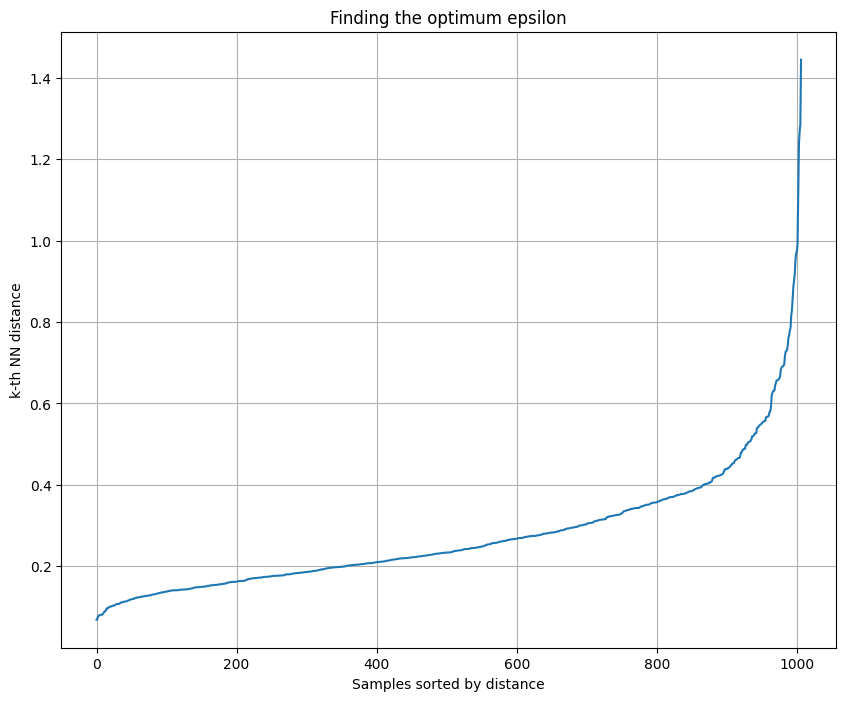

In [74]:
from sklearn.neighbors import NearestNeighbors
Neighbors = NearestNeighbors(n_neighbors=6)
nbrs = Neighbors.fit(data_normal)
distances, indices = nbrs.kneighbors(data_normal)
distances = np.sort(distances, axis=0)

# plot the distances
fig=plt.figure(figsize=(10,8))
distances = distances[:,-1]
plt.plot(distances)
plt.title('Finding the optimum epsilon')
plt.xlabel('Samples sorted by distance')
plt.ylabel('k-th NN distance')
plt.grid()
plt.show()

Build, train, and evaluate a K-Means model.

In [97]:
# 1. import the necessary modules for the selected model (DBSCAN)
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# 2. create the model
model = DBSCAN(eps=0.38, min_samples=8, metric='euclidean')

# 3. fit the model
model.fit(data_normal)

# 4. predict the clusters
labels = model.labels_

# 5. visualize the clusters
fig = px.scatter_3d(x = data_normal[:,0], y = data_normal[:,1], z = data_normal[:,2], color = labels)
fig.update_traces(marker=dict(size=2))
fig.show()

# 6. evaluate the model
# create dataframe
df = pd.DataFrame(data_normal, columns=['X', 'Y', 'Z'])
df['Cluster'] = labels

# filter out the noise points
df = df[df['Cluster'] != -1]

# calculate the silhouette score
print('Silhouette Score:', silhouette_score(df[['X', 'Y', 'Z']], df['Cluster']))

Silhouette Score: 0.4553196472324561


Silhouette Score: 0.4553196472324561


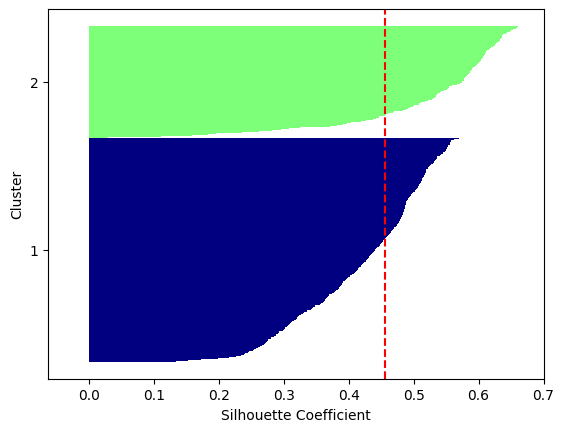

In [84]:
# plot the silhouette values
plot_silhouette(df[['X', 'Y', 'Z']], df['Cluster'])

---
## EXERCISE

c:\Users\chesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\chesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\chesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\chesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

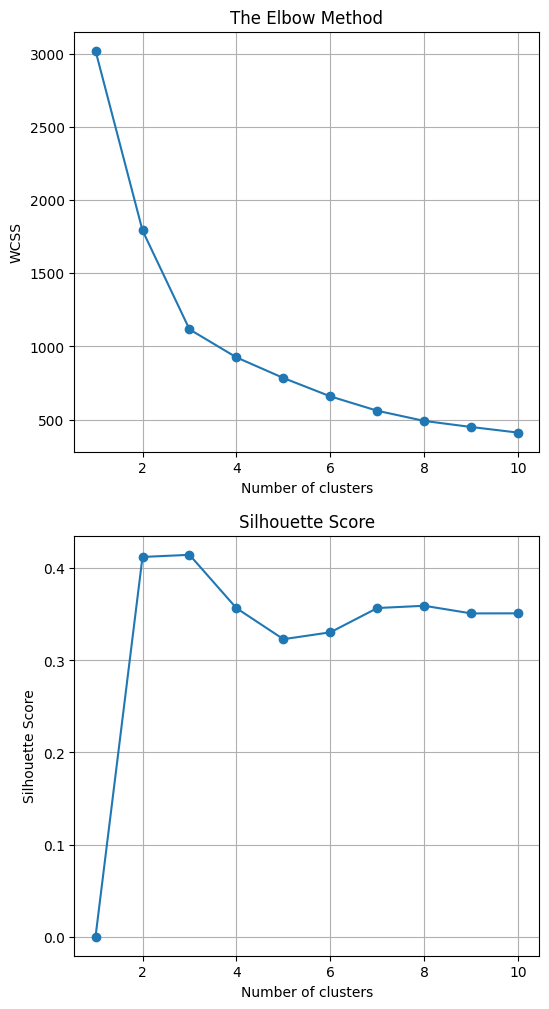

In [85]:
# use the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
silhouette_scores = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_normal)
    wcss.append(kmeans.inertia_)
    labels = kmeans.predict(data_normal)
    
    if i == 1:
        silhouette_scores.append(0)
    else:
        silhouette_scores.append(silhouette_score(data_normal, labels))

# plot the elbow graph
plt.figure(figsize=(6, 12))
plt.subplot(2, 1, 1)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()

# plot the silhouette scores
plt.subplot(2, 1, 2)
plt.plot(range(1, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

In [99]:
# visualize the clusters for the optimal number of clusters
model = KMeans(n_clusters=2)
model.fit(data_normal)
labels = model.predict(data_normal)

fig = px.scatter_3d(x = data_normal[:,0], y = data_normal[:,1], z = data_normal[:,2], color = labels)
fig.update_traces(marker=dict(size=2))
fig.show()

c:\Users\chesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



<hr style="margin-top: 4rem;">
<h2>Author</h2>

<a href="https://github.com/SamerHany">Samer Hany</a>

<h2>References</h2>

- Hoss Belyadi, Alireza Haghighat, 2021. Machine Learning Guide for Oil and Gas Using Python
- Ankur Kumar, Jesus Flores-Cerrillo, 2022. Machine Learning in Python for Process Systems Engineering